## Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression,SGDRegressor, PoissonRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv')

In [3]:
df=pd.DataFrame(data=data)

In [4]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Exploratory Data Analysis

Checking the head and tail data of the dataset

In [5]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Checking the shape of the dataset

In [7]:
df.shape

(18249, 14)

Checking the information of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- The dataset has a total of 18249 rows and 14 columns.
- No null values is observed in the initial evaluation.
- Object, integer and fload data types are present in the dataset. The Date column is mentioned as object. We need to convert it to date type.
- Based on the initial review, the "unknown" column does not appear to be useful. Hence we can drop it after further inspection. 
- In this dataset we need to predict the average price and region. Hence, both Regression and Classification modeling needs to be performed. 

Checking null values

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Checking for black space in the dataset

In [10]:
df[df.values==' '].sum()

Unnamed: 0        0
Date              0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type              0
year              0
region            0
dtype: object

- No blank space observed in the dataset

Converting date column from object to datetime

In [11]:
df['Date']=pd.to_datetime(df['Date'])

Separating the Date column into Year, Month, Day

In [12]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

- We have separated the date column into year, month and day. 
- Now, we can remove the Date and year column from the dataset.

Dropping the Date, year and Unnamed column

In [13]:
df.drop('Date',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

Checking the revised dataset

In [14]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


Checking the revised datatypes

In [15]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
Year              int32
Month             int32
Day               int32
dtype: object

In [16]:
sorted_values=df.sort_values(by=['Month','Day'],ascending=True)
sorted_values

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
5668,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,Albany,2017,1,1
5721,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,conventional,Atlanta,2017,1,1
5774,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,conventional,BaltimoreWashington,2017,1,1
5827,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,conventional,Boise,2017,1,1
5880,1.29,458830.49,4119.90,371223.34,3933.72,79553.53,79339.78,213.75,0.00,conventional,Boston,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,1.20,4873.10,51.97,54.57,0.00,4766.56,3051.42,1715.14,0.00,organic,Syracuse,2017,12,31
17391,1.59,5528.74,76.28,474.42,0.00,4978.04,4716.25,261.79,0.00,organic,Tampa,2017,12,31
17444,1.52,1243940.09,120545.76,248123.56,1279.48,873874.64,723304.51,150460.36,109.77,organic,TotalUS,2017,12,31
17497,1.48,229477.07,26883.07,53165.30,86.61,149342.09,66254.72,82977.60,109.77,organic,West,2017,12,31


In [17]:
sorted_values=df.groupby(['region','Year']).apply(lambda x: x.sort_values(by=['Month','Day'])).reset_index(drop=True)
sorted_values.head(20)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015,1,4
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015,1,4
2,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,Albany,2015,1,11
3,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,Albany,2015,1,11
4,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,Albany,2015,1,18
5,1.93,1118.47,8.02,178.78,0.00,931.67,931.67,0.00,0.0,organic,Albany,2015,1,18
6,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,Albany,2015,1,25
7,1.89,1115.89,14.87,148.72,0.00,952.30,952.30,0.00,0.0,organic,Albany,2015,1,25
8,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,Albany,2015,2,1
9,1.83,1228.51,33.12,99.36,0.00,1096.03,1096.03,0.00,0.0,organic,Albany,2015,2,1


Checking the unique counts of column 'type'

In [18]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [19]:
df['type'].nunique()

2

- There are only two types of avocado present in the dataset i.e. conventional and organic

Checking the value count of 'type'

In [20]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

- There are 9126 rows for conventional avocado and 9123 rows for organic avocado.

Checking the unique values and count of column 'region'

In [21]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [22]:
df['region'].nunique()

54

- There are total of 54 regions are present in the dataset.

Checking the unique values and counts of Year

In [23]:
df['Year'].unique()

array([2015, 2016, 2017, 2018])

- There are total 4 years of data present in the dataset

In [24]:
df['Year'].value_counts(normalize=True)

Year
2017    0.313551
2016    0.307743
2015    0.307688
2018    0.071018
Name: proportion, dtype: float64

- 31 percent of data is available for 2017. Both 2016 and 2015 has 30 percent of data. 2018 has only 7 percent of data in the dataset

Checking uniques values of 'XLarge Bags'

In [25]:
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

Separating numerical and categorical columns

In [26]:
cat_columns=[column for column in df.columns if df[column].dtype=='O']
num_columns=[column for column in df.columns if column not in cat_columns]

Checking categorical columns list

In [27]:
cat_columns

['type', 'region']

Checking numerical columns list

In [28]:
num_columns

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year',
 'Month',
 'Day']

## Data Visualization

Univariate analysis

Visualizing all the numerical columns using hist plot

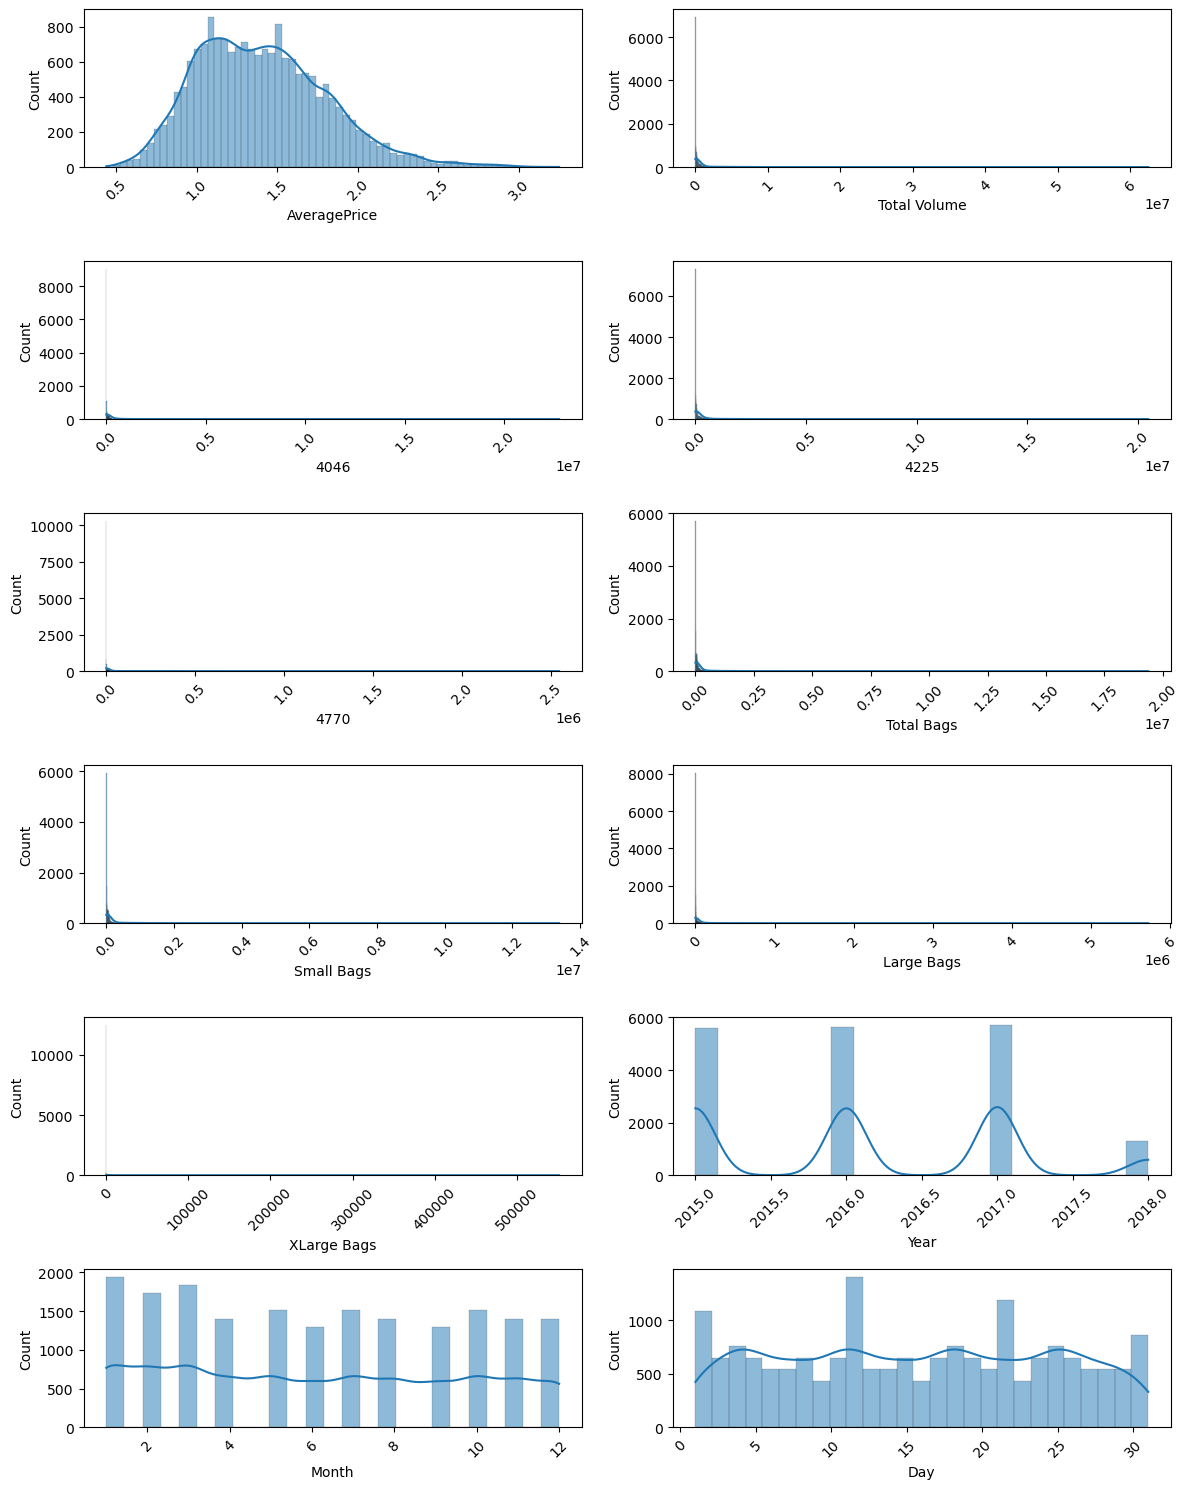

In [29]:
plt.figure(figsize=(12,15))
for index,column in enumerate(num_columns):
    if index<=(len(num_columns)):
        plt.subplot(6,2,index+1)
        sns.histplot(x=column,kde=True,data=df,linewidth=.1)
        plt.xticks(rotation=45)
        plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

- No skewness can be observed in day and month column
- We can observe that the AveragePrice column almost looks normal. However, a slight right skewed can be observed.
- Columns Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags has high skewness (right skewed) present.

Visualizing type columns using count plot 

<Axes: xlabel='type', ylabel='count'>

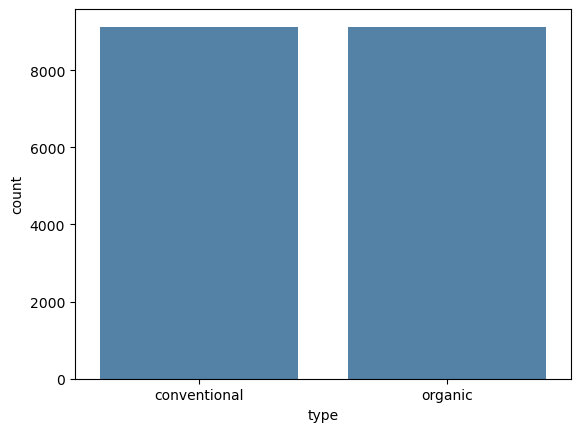

In [30]:
sns.countplot(x='type',data=df,color='Steelblue')

- We can observe that both the count of conventional and organic are almost same.

Visualizing region columns using count plot

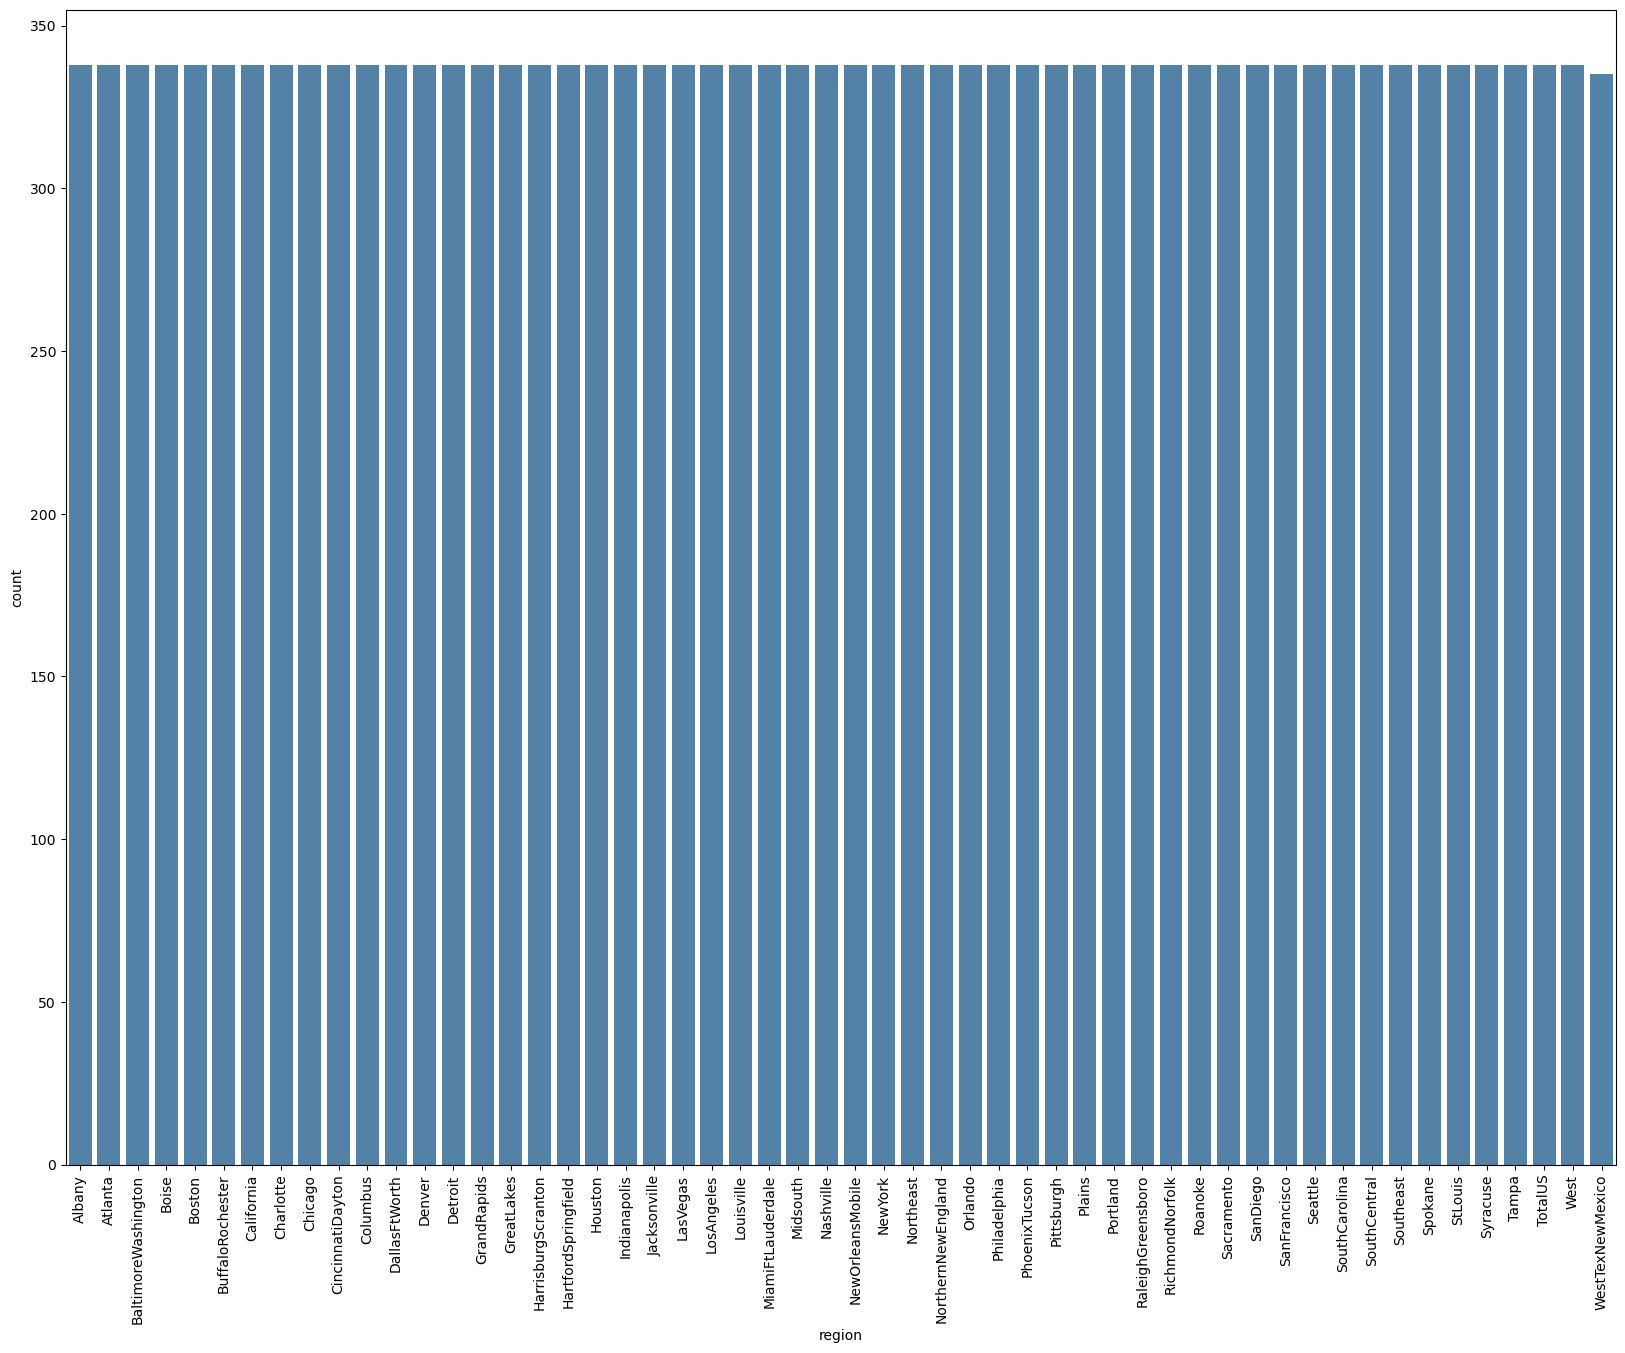

In [31]:
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=df,color='Steelblue')
plt.xticks(rotation=90)
plt.show()

- The counts for all regions are nearly the same, except for WestTexNewMexico, which has a slightly lower value count compared to the others.

Bivariate analysis

Visualizing total number of avocado sold per year

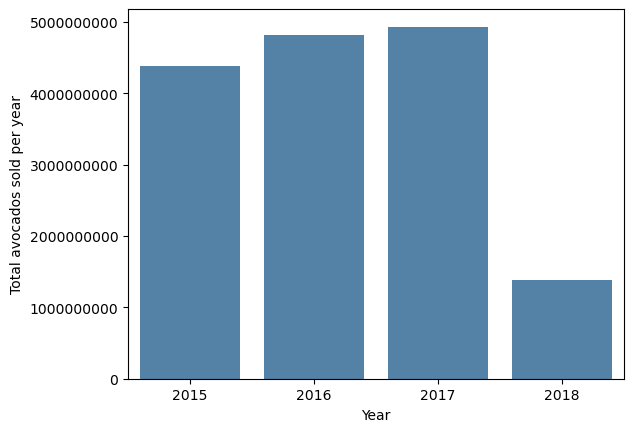

In [32]:
total_avocados_per_year=df.groupby('Year')['Total Volume'].sum().reset_index()
sns.barplot(x='Year',y='Total Volume',color='Steelblue',data=total_avocados_per_year)
plt.xlabel('Year')
plt.ylabel('Total avocados sold per year')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

- The volume of avocado sold gradually increased from 2015 to 2017 per year. The volume sold in 2018 is less as the data available is onlt till May.

Visualizing Total Volume of Avocados Sold per Month

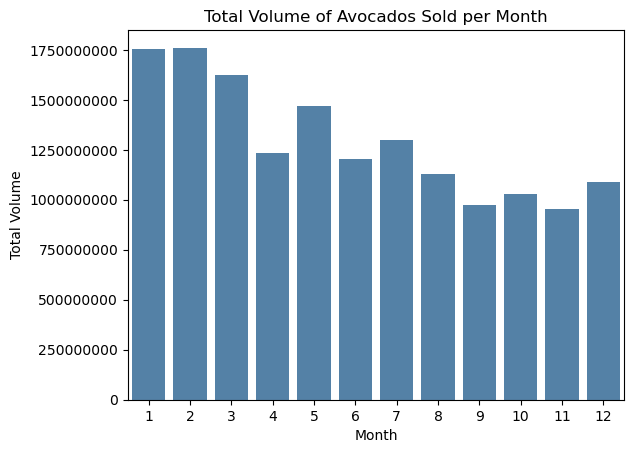

In [33]:
total_volume_per_month = df.groupby('Month')['Total Volume'].sum().reset_index()
sns.barplot(x='Month', y='Total Volume', color='Steelblue', data=total_volume_per_month)
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocados Sold per Month')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

- The sale of avocado is high at the begining months of the year and declines by the end of the month.

Checking the total volume of avocado sold each year as per type

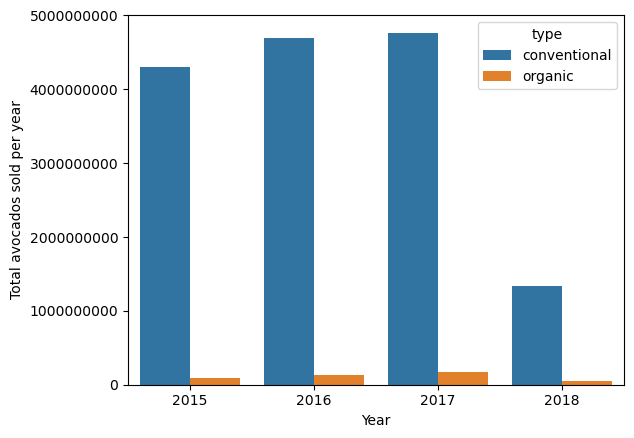

In [34]:
total_avocados_per_year=df.groupby(['Year','type'])['Total Volume'].sum().reset_index()
sns.barplot(x='Year',y='Total Volume',hue='type',data=total_avocados_per_year)
plt.xlabel('Year')
plt.ylabel('Total avocados sold per year')
plt.ticklabel_format(style='plain',axis='y')

- Total volume of conventional avocado sold per year is very high compared to organic avocado.

Visualizing total volumn of avocados Sold by region

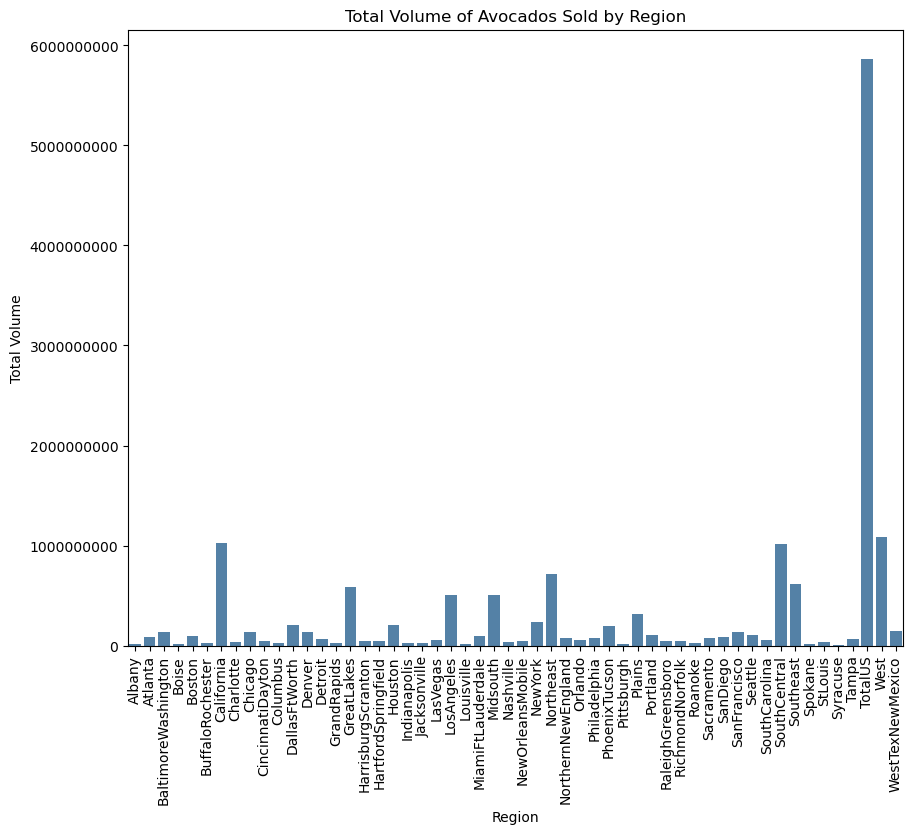

In [35]:
total_volume_per_region = df.groupby('region')['Total Volume'].sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='region', y='Total Volume', color='Steelblue',data=total_volume_per_region)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocados Sold by Region')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

-  The values for TotalUS is very high. Hence we can remove it.

Visualizing Average Price for each type of avocado per year

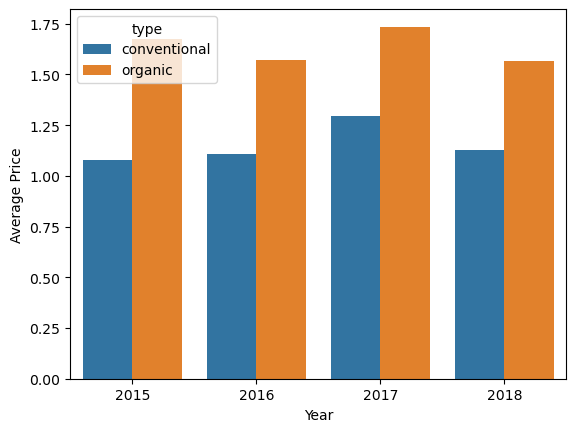

In [36]:
average_price_per_type_each_region=df.groupby(['type','Year'])['AveragePrice'].mean().reset_index()

sns.barplot(x='Year',y='AveragePrice',hue='type',data=average_price_per_type_each_region)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain',axis='y')

- Organic avocados are more costlier than conventional type. 

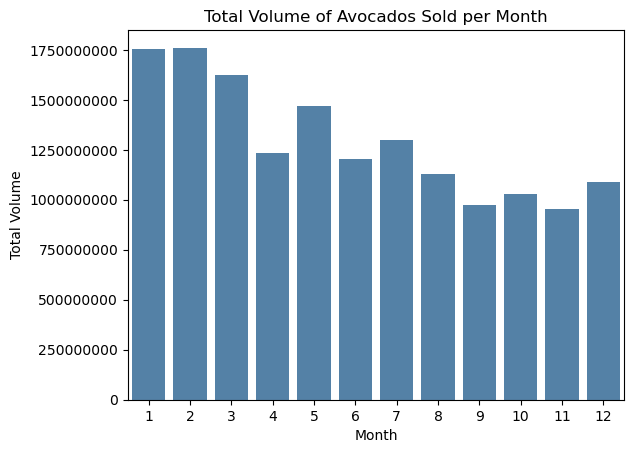

In [37]:
total_volume_per_month = df.groupby('Month')['Total Volume'].sum().reset_index()
sns.barplot(x='Month', y='Total Volume', color='Steelblue',data=total_volume_per_month)
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocados Sold per Month')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Lineplot to check the AveragePrice based on Year

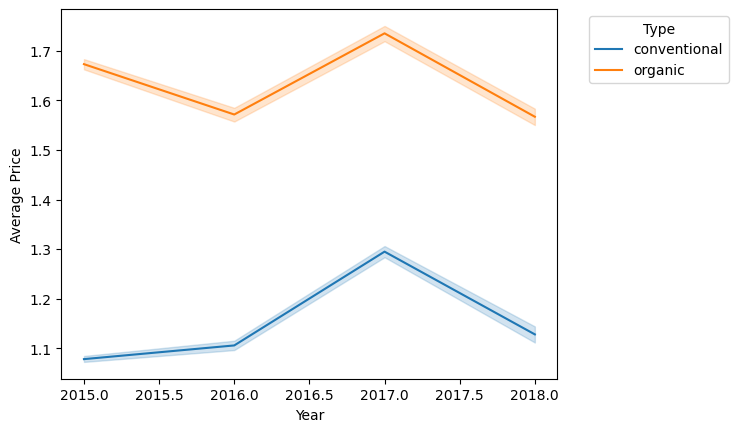

In [38]:
sns.lineplot(x="Year", y="AveragePrice", hue='type', data=df)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lineplot to check the AveragePrice based on Month for each year

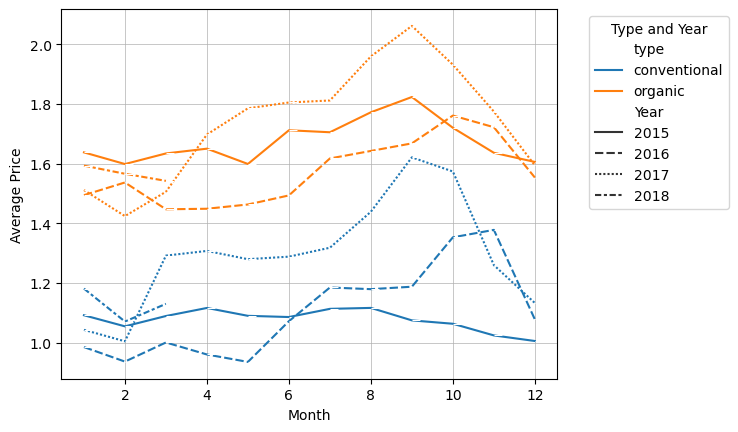

In [39]:
df_groupby_month=df.groupby(['Month','Year','type'])['AveragePrice'].mean().reset_index()
sns.lineplot(x="Month", y="AveragePrice", hue='type', style='Year',data=df_groupby_month, marker=True)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Type and Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linewidth=0.5)
plt.show()

- We can observe that the gradual rise in average price from the month 8 to 10. 

Lineplot to check the AveragePrice based on day for each year

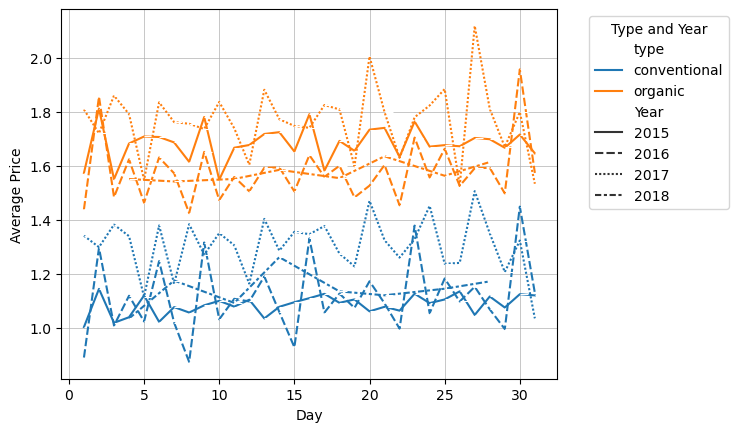

In [40]:
df_groupby_day=df.groupby(['Day','Year','type'])['AveragePrice'].mean().reset_index()
sns.lineplot(x="Day", y="AveragePrice", hue='type', style='Year',data=df_groupby_day, marker=True)
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.legend(title='Type and Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linewidth=0.5)
plt.show()

Average price per region in descending order

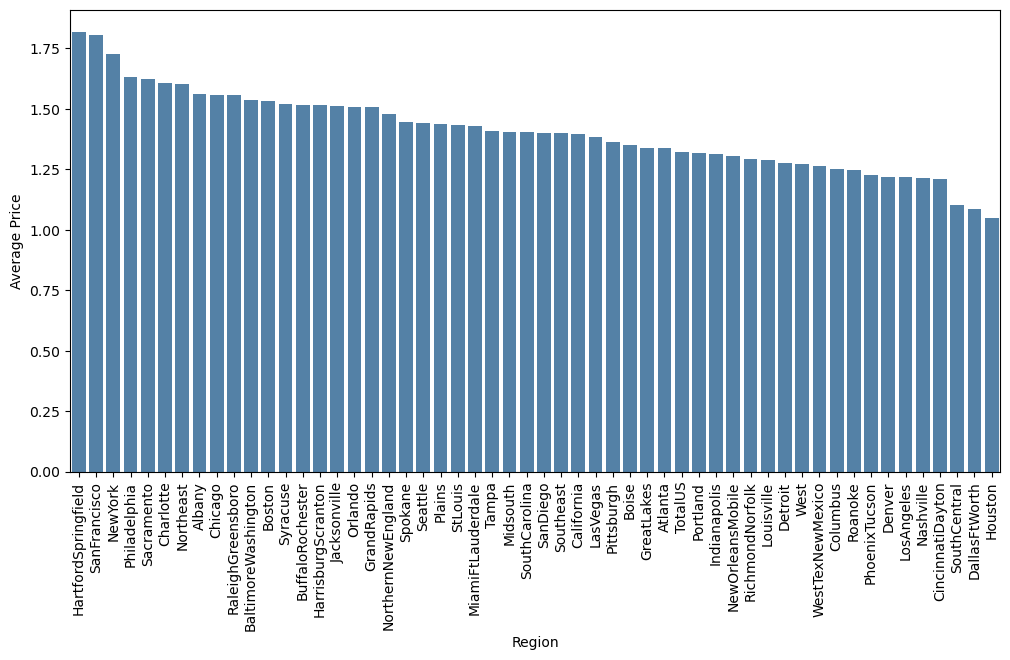

In [41]:
average_price_per_region = df.groupby('region')['AveragePrice'].mean().reset_index()
high_price_regions = average_price_per_region.sort_values(by='AveragePrice', ascending=False)
plt.figure(figsize=(12, 6))  
sns.barplot(x='region', y='AveragePrice', color='Steelblue', data=high_price_regions)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

Total Volume each region in descending order

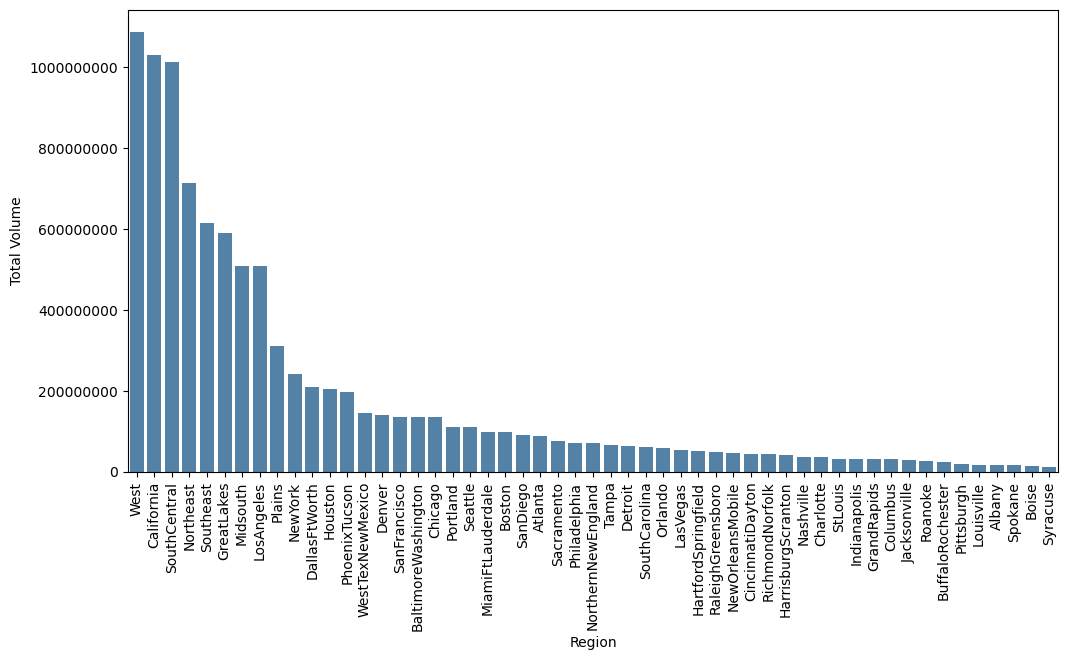

In [42]:
filtered_df = df[df['region'] != 'TotalUS']
average_price_per_region = filtered_df.groupby('region')['Total Volume'].sum().reset_index()
high_price_regions = average_price_per_region.sort_values(by='Total Volume', ascending=False)
plt.figure(figsize=(12, 6))  
sns.barplot(x='region', y='Total Volume', color='Steelblue', data=high_price_regions)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Checking the total Small Bags sold each year for both types

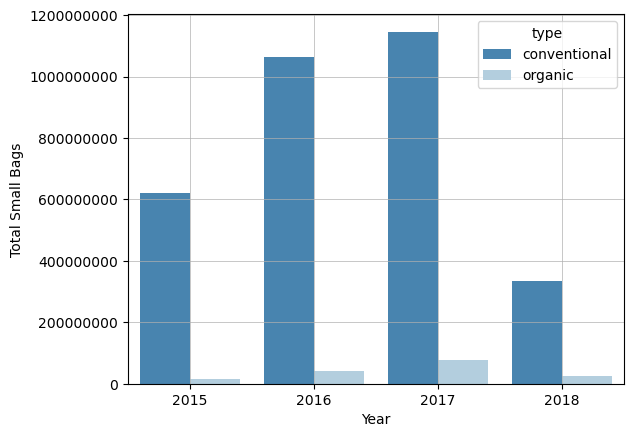

In [43]:
df_small_bags=df.groupby(['Year','type'])['Small Bags'].sum().reset_index()
sns.barplot(x='Year',y='Small Bags',hue='type',palette='Blues_r', data=df_small_bags)
plt.xlabel('Year')
plt.ylabel('Total Small Bags')
plt.ticklabel_format(style='plain',axis='y')
plt.grid(True,which='both',linewidth=.5)

Checking the total Large Bags sold each year for both types

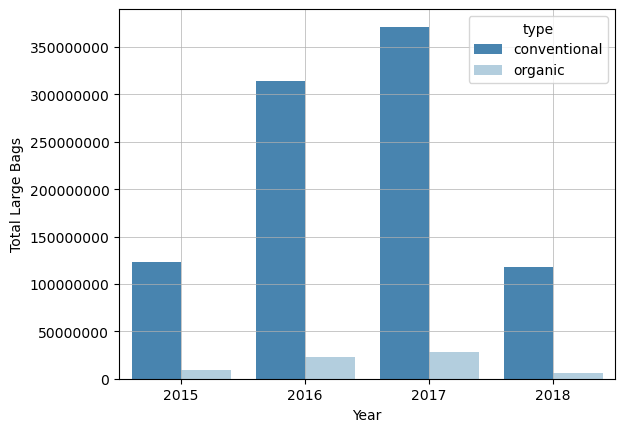

In [44]:
df_large_bags=df.groupby(['Year','type'])['Large Bags'].sum().reset_index()
sns.barplot(x='Year',y='Large Bags',hue='type',palette='Blues_r', data=df_large_bags)
plt.xlabel('Year')
plt.ylabel('Total Large Bags')
plt.ticklabel_format(style='plain',axis='y')
plt.grid(True,which='both',linewidth=.5)

Checking the total XLarge Bags sold each year for both types

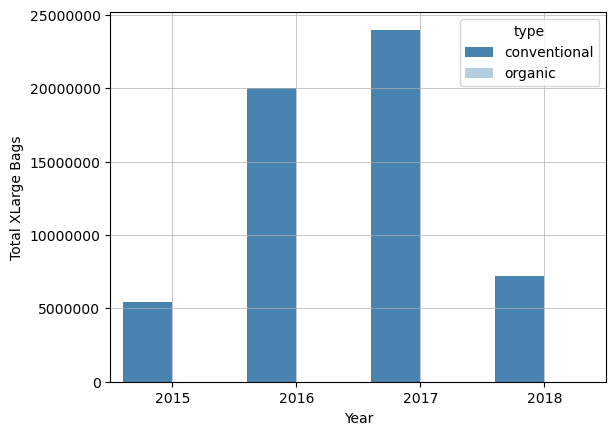

In [45]:
df_extra_bags=df.groupby(['Year','type'])['XLarge Bags'].sum().reset_index()
sns.barplot(x='Year',y='XLarge Bags',hue='type',palette='Blues_r', data=df_extra_bags)
plt.xlabel('Year')
plt.ylabel('Total XLarge Bags')
plt.ticklabel_format(style='plain',axis='y')
plt.grid(True,which='both',linewidth=.5)

Multivariate analysis

In [46]:
sns.pairplot(df)

Removig TotalUS rows

In [47]:
df=df[df['region'] != 'TotalUS']

#### Checking outliers in the dataset

Checking outliers using Boxplot

In [48]:
data=df.copy()

In [49]:
def outliers_boxplot(data):
    plt.figure(figsize=(10,20))
    for index,feature in enumerate(num_columns):
        plt.subplot((len(num_columns)//3)+1,3,index+1)
        sns.boxplot(data[feature],palette='deep',linewidth=.2)
        plt.xlabel(feature)
        plt.ticklabel_format(style='plain',axis='y')
    plt.tight_layout()

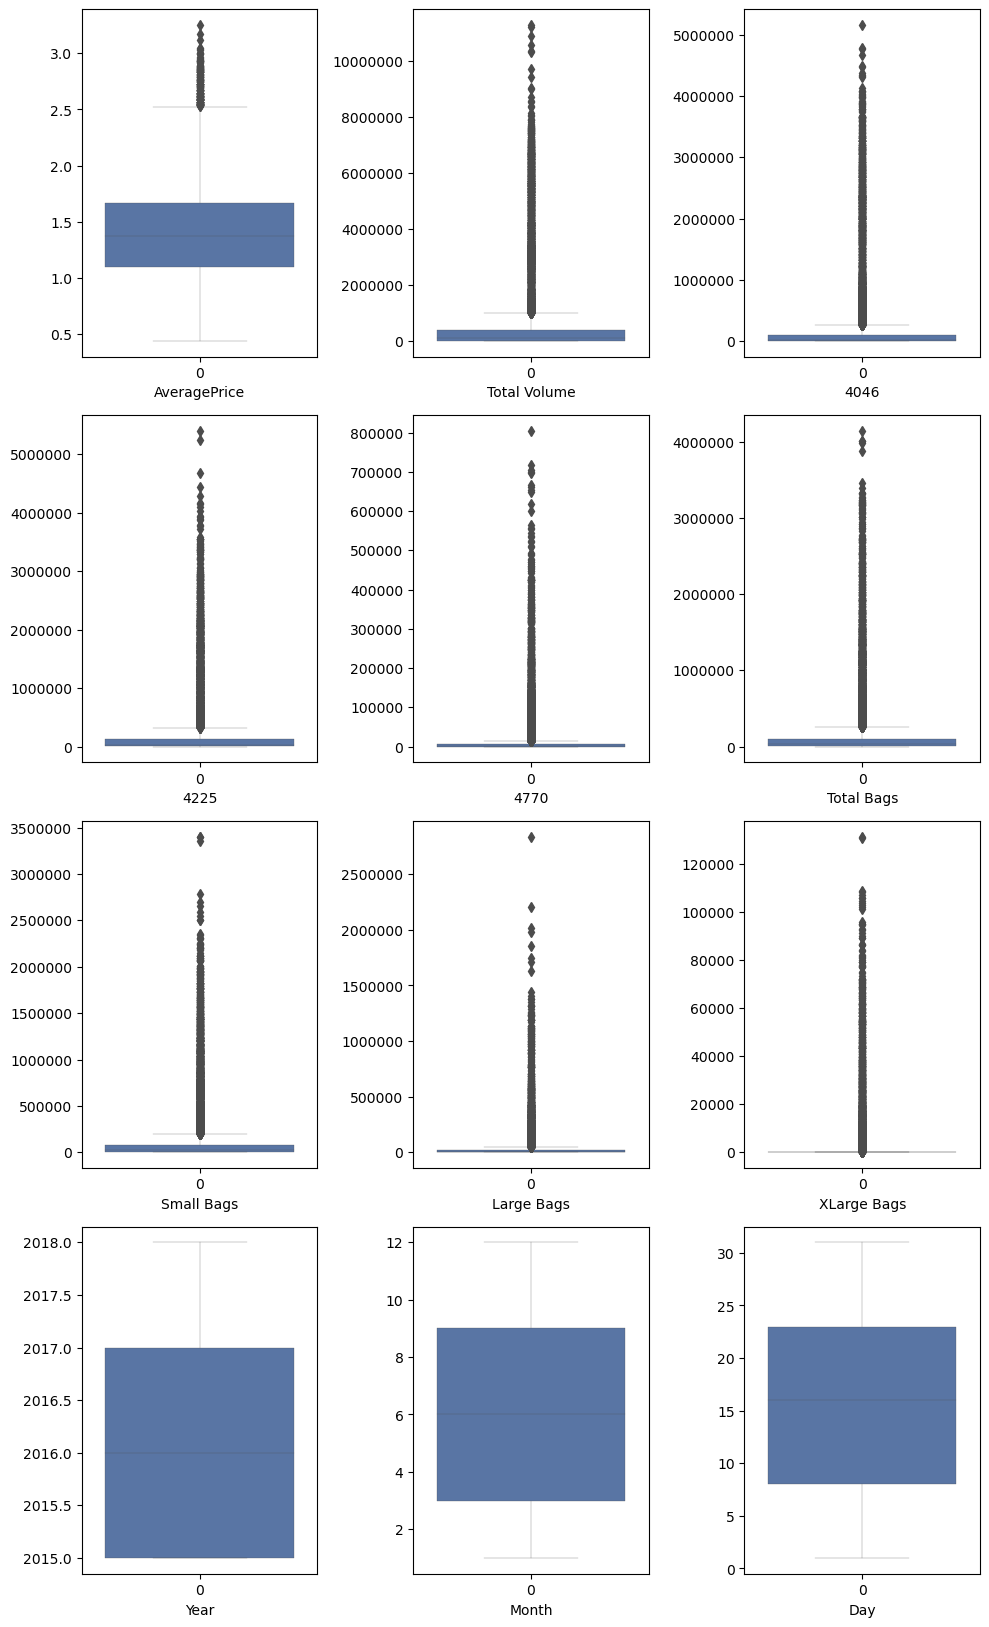

In [50]:
outliers_boxplot(data)

Analyzing outliers using zscore

In [51]:
def outliers_detection(data):
    rev_num_columns=[column for column in num_columns if column not in ['AveragePrice','Year','Month','Day']]
    z_score=np.abs(zscore(data[rev_num_columns]))
    print(np.where(z_score>3))
    return z_score

In [52]:
z_score=outliers_detection(data)

(array([ 312,  312,  312, ..., 8944, 8944, 8944], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


Removing outliers

In [53]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [54]:
data=removing_outliers(z_score,data)

Checking total data loss after removing outliers

In [55]:
total_data_loss=df.shape[0]-data.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 1299


Checking total percentage of data loss after removing outliers

In [56]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 7.25%


- Total data lost after outliers removal is 7.25% which is under acceptable range.

Checking outliers through IQR method

In [57]:
Q1 = df['Total Volume'].quantile(0.25)
Q3 = df['Total Volume'].quantile(0.75)

IQR=Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [58]:
rev_num_columns=[column for column in num_columns if column not in ['AveragePrice','Year','Month','Day']]

In [59]:
Q1 = df[rev_num_columns].quantile(0.25)
Q3 = df[rev_num_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (df[rev_num_columns] >= lower_bound) & (df[rev_num_columns] <= upper_bound)

df_no_outliers = df[mask.all(axis=1)]

In [60]:
total_data_loss=df.shape[0]-df_no_outliers.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 6452


In [61]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 36.02%


- Total data lost after outliers removal is 36.02% which is very high data loss.
- Hence we will use zscore to to remove outliers

Apply zscore to df

In [62]:
df=data.reset_index(drop=True)

Checking the revised shape of df

In [63]:
df.shape

(16612, 14)

#### Checking the skewness of numerical columns

In [64]:
df[num_columns].skew()

AveragePrice    0.537740
Total Volume    3.158976
4046            3.991478
4225            3.548288
4770            5.140743
Total Bags      3.657814
Small Bags      3.982024
Large Bags      4.370479
XLarge Bags     5.627688
Year            0.215665
Month           0.094030
Day             0.010913
dtype: float64

- We have observed skewness at columns Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags.

Removing skewness from Total Volume

Removing skewness by applying sqrt method

In [65]:
total_volume_by_sqrt=np.sqrt(df['Total Volume'])
total_volume_by_sqrt.skew()

1.2805211647459003

Removing skewness by applying cbrt method

In [66]:
total_volume_by_cbrt=np.cbrt(df['Total Volume'])
total_volume_by_cbrt.skew()

0.7558179787828082

Removing skewness by applying log method

In [67]:
total_volume_log=np.log(df['Total Volume'])
total_volume_log.skew()

-0.14880320649738

Removing skewness by applying boxcox method

In [68]:
total_volume_by_boxcox,_=boxcox(df['Total Volume'])
data=pd.DataFrame()
data['Total Volume']=total_volume_by_boxcox
data['Total Volume'].skew()

-0.034158042900340115

Applying boxcox to Total Volume

In [69]:
df['Total Volume']=total_volume_by_boxcox

Removing skewness from 4046

Removing skewness by applying sqrt method

In [70]:
C_4046_by_sqrt=np.sqrt(df['4046'])
C_4046_by_sqrt.skew()

1.8911375566446156

Removing skewness by applying cbrt method

In [71]:
C_4046_by_cbrt=np.cbrt(df['4046'])
C_4046_by_cbrt.skew()

1.1958687908282852

Removing skewness by applying log method

In [72]:
C_4046_by_log=np.log(df['4046']+.1)
C_4046_by_log.skew()

-0.6953365622605283

Removing skewness by applying boxcox method

In [73]:
c_4046_by_boxcox,_=boxcox(df['4046']+.001)
data=pd.DataFrame()
data['4046']=c_4046_by_boxcox
data['4046'].skew()

-0.03780958914168531

Applying boxocx to 4046

In [74]:
df['4046']=c_4046_by_boxcox

Removing skewness from 4225

Removing skewness by applying sqrt method`

In [75]:
C_4225_by_sqrt=np.sqrt(df['4225'])
C_4225_by_sqrt.skew()

1.5233209546690885

Removing skewness by applying cbrt method`

In [76]:
C_4225_by_cbrt=np.cbrt(df['4225'])
C_4225_by_cbrt.skew()

0.8819689117547692

Removing skewness by applying log method

In [77]:
C_4225_by_log=np.log(df['4225']+.1)
C_4225_by_log.skew()

-0.8320706387645994

Removing skewness by applying boxcox method

In [78]:
c_4225_by_boxcox,_=boxcox(df['4225']+.001)
data=pd.DataFrame()
data['4225']=c_4225_by_boxcox
data['4225'].skew()

-0.06231830510602125

Applying boxcox to 4225

In [79]:
df['4225']=c_4225_by_boxcox

Removing skewness from 4770

Removing skewness by applying sqrt method

In [80]:
c_4770_by_sqrt=np.sqrt(df['4770'])
c_4770_by_sqrt.skew()

2.470358296574421

Removing skewness by applying cbrt method

In [81]:
c_4770_by_cbrt=np.cbrt(df['4770'])
c_4770_by_cbrt.skew()

1.509578900006394

Removing skewness by applying log method

In [82]:
c_4770_by_log=np.log(df['4770']+.1)
c_4770_by_log.skew()

-0.11300952167708736

Removing skewness by applying boxcox method

In [83]:
c_4770_by_boxcox,_=boxcox(df['4770']+.1)
data=pd.DataFrame()
data['4770']=c_4770_by_boxcox
data['4770'].skew()

-0.043233668479330585

Applying boxcox to 4770

In [84]:
df['4770']=c_4770_by_boxcox

Removing skewness from Total Bags

Removing skewness by applying sqrt

In [85]:
total_bags_by_sqrt=np.sqrt(df['Total Bags'])
total_bags_by_sqrt.skew()

1.3630993314691582

Removing skewness by applying cbrt

In [86]:
total_bags_by_cbrt=np.cbrt(df['Total Bags'])
total_bags_by_cbrt.skew()

0.7136763009965804

Removing skewness by applying log

In [87]:
total_bags_by_log=np.log(df['Total Bags']+.1)
total_bags_by_log.skew()

-0.6668559559901744

Removing skewness by applying boxcox

In [88]:
total_bags_by_boxcox,_=boxcox(df['Total Bags']+.001)
data=pd.DataFrame()
data['Total Bags']=total_bags_by_boxcox
data['Total Bags'].skew()

-0.051262805889927085

Applying boxcox to Total Bags

In [89]:
df['Total Bags']=total_bags_by_boxcox

Removing skewness from Small Bags

Removing skewness by applying sqrt

In [90]:
small_bags_by_sqrt=np.sqrt(df['Small Bags'])
small_bags_by_sqrt.skew()

1.4710504851635686

Removing skewness by applying cbrt

In [91]:
small_bags_by_cbrt=np.cbrt(df['Small Bags'])
small_bags_by_cbrt.skew()

0.7247438593226732

Removing skewness by applying log

In [92]:
small_bags_by_log=np.log(df['Small Bags']+1)
small_bags_by_log.skew()

-0.9786041284275258

Removing skewness by applying boxcox

In [93]:
small_bags_by_boxcox,_=boxcox(df['Small Bags']+.001)
data=pd.DataFrame()
data['Small Bags']=small_bags_by_boxcox
data['Small Bags'].skew()

-0.06647156556389587

Applying boxcox to small bags

In [94]:
df['Small Bags']=small_bags_by_boxcox

Removing skewness from Large Bags

Removing skewness by applying sqrt

In [95]:
large_bags_by_sqrt=np.sqrt(df['Large Bags'])
large_bags_by_sqrt.skew()

1.93874068422537

Removing skewness by applying cbrt

In [96]:
large_bags_by_cbrt=np.cbrt(df['Large Bags'])
large_bags_by_cbrt.skew()

1.0823783313817568

Removing skewness by applying log

In [97]:
large_bags_by_log=np.log(df['Large Bags']+1)
large_bags_by_log.skew()

-0.6047336686448748

Removing skewness by applying boxcox

In [98]:
large_bags_by_boxcox,_=boxcox(df['Large Bags']+.001)
data=pd.DataFrame()
data['Large Bags']=large_bags_by_boxcox
data['Large Bags'].skew()

-0.2776483137525189

Applying BoxCox to Large Bags

In [99]:
df['Large Bags']=large_bags_by_boxcox

Removing skewness from XLarge Bags

Removing skewness by applying sqrt

In [100]:
xlarge_bags_by_sqrt=np.sqrt(df['XLarge Bags'])
xlarge_bags_by_sqrt.skew()

3.0242048684199054

Removing skewness by applying cbrt

In [101]:
xlarge_bags_by_cbrt=np.cbrt(df['XLarge Bags'])
xlarge_bags_by_cbrt.skew()

2.1979562690593806

Removing skewness by applying log

In [102]:
xlarge_bags_by_sqrt=np.log(df['XLarge Bags']+.001)
xlarge_bags_by_sqrt.skew()

1.0737856097924663

Removing skewness by applying boxcox

In [103]:
xlarge_bags_by_boxcox,_=boxcox(df['XLarge Bags']+.001)
data=pd.DataFrame()
data['XLarge Bags']=xlarge_bags_by_boxcox
data['XLarge Bags'].skew()

0.9469734083878718

Applying boxcox to XLarge Bags

In [104]:
df['XLarge Bags']=xlarge_bags_by_boxcox

Checking the revised skewness

In [105]:
df[num_columns].skew()

AveragePrice    0.537740
Total Volume   -0.034158
4046           -0.037810
4225           -0.062318
4770           -0.043234
Total Bags     -0.051263
Small Bags     -0.066472
Large Bags     -0.277648
XLarge Bags     0.946973
Year            0.215665
Month           0.094030
Day             0.010913
dtype: float64

- The skewness in the dataset is within the range 

We need make two copies of the dataset one for regression and another for classification analysis.

In [106]:
df_linear=df.copy()
df_classifier=df.copy()

#### Encoding categorical columns

Performing Label Encoding for Linear regression

In [107]:
le=LabelEncoder()
df_linear[cat_columns]=df_linear[cat_columns].apply(lambda column: le.fit_transform(column))

Checking the datset after encoding

In [108]:
df_linear

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,14.319882,9.891802,22.772871,4.019859,17.131493,20.779815,6.175369,-16.34236,0,0,2015,12,27
1,1.35,14.062591,9.068005,22.031941,4.225757,17.416941,21.175656,6.255701,-16.34236,0,0,2015,12,20
2,0.93,15.333724,9.378637,25.510613,5.099842,16.923229,20.484791,6.358148,-16.34236,0,0,2015,12,13
3,1.08,14.660474,10.064387,23.843463,4.461634,15.877102,19.013042,6.840700,-16.34236,0,0,2015,12,6
4,1.28,13.944759,9.704246,21.965381,4.508317,16.066353,19.231574,7.597167,-16.34236,0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,1.63,12.210540,11.266383,11.842888,-2.253949,18.575082,22.681163,9.230328,-16.34236,1,52,2018,2,4
16608,1.71,11.892772,10.165972,13.917054,-2.253949,17.334259,20.948971,8.615656,-16.34236,1,52,2018,1,28
16609,1.87,11.879345,10.166338,13.030536,7.011527,17.378890,21.148908,4.822370,-16.34236,1,52,2018,1,21
16610,1.93,12.129855,10.663990,13.541088,7.010082,17.883701,21.848430,5.096840,-16.34236,1,52,2018,1,14


Dropping the XLarge Bags column

In [109]:
df_linear.drop('XLarge Bags',axis=1,inplace=True)

Separating dependent and independent variables

In [110]:
x=df_linear.drop('AveragePrice',axis=1)
y=df_linear['AveragePrice']

#### Feature Scaling

In [111]:
def scaling_stdScaler(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [112]:
x=scaling_stdScaler(x)

Checking the dataset x

In [113]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Year,Month,Day
0,0.026815,-0.597416,0.493379,-0.003368,-0.493737,-0.294277,-0.600665,-1.081312,-1.687624,-1.219053,1.637495,1.290184
1,-0.052308,-0.713190,0.399726,0.037072,-0.451717,-0.254834,-0.592054,-1.081312,-1.687624,-1.219053,1.637495,0.492291
2,0.338593,-0.669534,0.839428,0.208748,-0.524395,-0.323674,-0.581073,-1.081312,-1.687624,-1.219053,1.637495,-0.305601
3,0.131554,-0.573161,0.628701,0.083400,-0.678394,-0.470325,-0.529351,-1.081312,-1.687624,-1.219053,1.637495,-1.103494
4,-0.088544,-0.623774,0.391312,0.092569,-0.650534,-0.448550,-0.448268,-1.081312,-1.687624,-1.219053,1.354876,1.518153
...,...,...,...,...,...,...,...,...,...,...,...,...
16607,-0.621854,-0.404236,-0.888167,-1.235588,-0.281230,-0.104819,-0.273216,0.924803,1.722721,1.976104,-1.188694,-1.331463
16608,-0.719575,-0.558885,-0.625993,-1.235588,-0.463888,-0.277422,-0.339100,0.924803,1.722721,1.976104,-1.471313,1.404168
16609,-0.723704,-0.558833,-0.738049,0.584217,-0.457318,-0.257499,-0.745688,0.924803,1.722721,1.976104,-1.471313,0.606276
16610,-0.646667,-0.488895,-0.673515,0.583933,-0.383006,-0.187796,-0.716268,0.924803,1.722721,1.976104,-1.471313,-0.191617


#### Variance Inflation Factor

In [114]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factors']=[VIF(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [115]:
vif_calc(x)

,Features,VIF Factors
0,Total Volume,45.477866
1,4046,6.015973
2,4225,9.884087
3,4770,3.373732
4,Total Bags,30.506491
5,Small Bags,15.014880
6,Large Bags,3.074058
7,type,3.725557
8,region,1.062858
9,Year,1.365588


- Total Volume, Total Bags and Small Bags has high variance inflation factor

Dropping Total Volume

In [116]:
x.drop('Total Volume',axis=1,inplace=True)

In [117]:
vif_calc(x)

,Features,VIF Factors
0,4046,3.159454
1,4225,3.709617
2,4770,3.361226
3,Total Bags,21.528916
4,Small Bags,15.013336
5,Large Bags,3.040375
6,type,3.572388
7,region,1.056979
8,Year,1.359562
9,Month,1.047329


Dropping Total Bags

In [118]:
x.drop('Total Bags',axis=1,inplace=True)

In [119]:
vif_calc(x)

,Features,VIF Factors
0,4046,3.136673
1,4225,3.563412
2,4770,3.361205
3,Small Bags,3.729729
4,Large Bags,1.633327
5,type,3.572002
6,region,1.056812
7,Year,1.341529
8,Month,1.047013
9,Day,1.000454


- The variance inflation factor in within acceptable range 

## Modelling

Calculating best random state and score

In [120]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [121]:
random_state_cal(x,y)

R2 Score :0.5179513948553045 Random state :29


Applying train_test_split with test_size=.30 and random_state=29

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=29)

Linear Regression Model

In [123]:
def linear_regression(x_train,x_test,y_train,y_test):
    
    model_lr=LinearRegression()
    model_lr.fit(x_train,y_train)
    prediction_lr=model_lr.predict(x_test)
    prediction_y_train=model_lr.predict(x_train)
    
    r2=r2_score(y_test,prediction_lr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_lr)
    mse=mean_squared_error(y_test,prediction_lr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_lr))
    prediction_chart=pd.DataFrame({'Linear Regression':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_lr 

In [124]:
prediction_chart,prediction_lr=linear_regression(x_train,x_test,y_train,y_test)
prediction_chart

,Linear Regression,Scores
0,R2 Score,51.795139
1,R2 Score on Training Data,49.068229
2,Mean Absolute Error,0.217625
3,Mean Squared Error,0.078393
4,Root Mean Squared Error,0.279987


Lasso Regression

In [125]:
def lasso(x_train,x_test,y_train,y_test):
    
    model_lasso=Lasso()
    model_lasso.fit(x_train,y_train)
    prediction_las=model_lasso.predict(x_test)
    prediction_y_train=model_lasso.predict(x_train)
    
    r2=r2_score(y_test,prediction_las) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_las)
    mse=mean_squared_error(y_test,prediction_las)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_las))
    prediction_chart=pd.DataFrame({'Lasso':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_las

In [126]:
prediction_chart,prediction_las=lasso(x_train,x_test,y_train,y_test)
prediction_chart

,Lasso,Scores
0,R2 Score,-0.000127
1,R2 Score on Training Data,0.000000
2,Mean Absolute Error,0.325332
3,Mean Squared Error,0.162624
4,Root Mean Squared Error,0.403267


Ridge Regression

In [127]:
def ridge(x_train,x_test,y_train,y_test):
    
    model_ridge=Ridge()
    model_ridge.fit(x_train,y_train)
    prediction_ridge=model_ridge.predict(x_test)
    prediction_y_train=model_ridge.predict(x_train)
    
    r2=r2_score(y_test,prediction_ridge) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ridge)
    mse=mean_squared_error(y_test,prediction_ridge)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ridge))
    prediction_chart=pd.DataFrame({'Ridge':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_ridge

In [128]:
prediction_chart,prediction_ridge=ridge(x_train,x_test,y_train,y_test)
prediction_chart

,Ridge,Scores
0,R2 Score,51.795216
1,R2 Score on Training Data,49.068228
2,Mean Absolute Error,0.217624
3,Mean Squared Error,0.078393
4,Root Mean Squared Error,0.279987


Random Forest

In [129]:
def random_forest(x_train,x_test,y_train,y_test):
    
    model_ran_forest=RandomForestRegressor()
    model_ran_forest.fit(x_train,y_train)
    prediction_rf=model_ran_forest.predict(x_test)
    prediction_y_train=model_ran_forest.predict(x_train)
    
    r2=r2_score(y_test,prediction_rf) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_rf)
    mse=mean_squared_error(y_test,prediction_rf)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_rf))
    prediction_chart=pd.DataFrame({'Random Forest':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_rf

In [130]:
prediction_chart, prediction_rf=random_forest(x_train,x_test,y_train,y_test)
prediction_chart

,Random Forest,Scores
0,R2 Score,87.982216
1,R2 Score on Training Data,98.261830
2,Mean Absolute Error,0.098133
3,Mean Squared Error,0.019544
4,Root Mean Squared Error,0.139799


KNN Regression

In [131]:
def knn(x_train,x_test,y_train,y_test):
    
    model_knn=KNN()
    model_knn.fit(x_train,y_train)
    prediction_knn=model_knn.predict(x_test)
    prediction_y_train=model_knn.predict(x_train)
    
    r2=r2_score(y_test,prediction_knn) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_knn)
    mse=mean_squared_error(y_test,prediction_knn)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_knn))
    prediction_chart=pd.DataFrame({'KNN':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_knn

In [132]:
prediction_chart,prediction_knn=knn(x_train,x_test,y_train,y_test)
prediction_chart

,KNN,Scores
0,R2 Score,78.960351
1,R2 Score on Training Data,85.944191
2,Mean Absolute Error,0.133057
3,Mean Squared Error,0.034216
4,Root Mean Squared Error,0.184974


SVR Regression

In [133]:
def svr(x_train,x_test,y_train,y_test):
    
    model_svr=SVR()
    model_svr.fit(x_train,y_train)
    prediction_svr=model_svr.predict(x_test)
    prediction_y_train=model_svr.predict(x_train)
    
    r2=r2_score(y_test,prediction_svr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_svr)
    mse=mean_squared_error(y_test,prediction_svr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_svr))
    prediction_chart=pd.DataFrame({'SVR':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_svr

In [134]:
prediction_chart, prediction_svr=svr(x_train,x_test,y_train,y_test)
prediction_chart

,SVR,Scores
0,R2 Score,79.592508
1,R2 Score on Training Data,80.055063
2,Mean Absolute Error,0.134219
3,Mean Squared Error,0.033188
4,Root Mean Squared Error,0.182174


Decision Tree Regressor

In [135]:
def decision_tree(x_train,x_test,y_train,y_test):
    
    model_dt=DTR()
    model_dt.fit(x_train,y_train)
    prediction_dt=model_dt.predict(x_test)
    prediction_y_train=model_dt.predict(x_train)
    
    r2=r2_score(y_test,prediction_dt) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_dt)
    mse=mean_squared_error(y_test,prediction_dt)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_dt))
    prediction_chart=pd.DataFrame({'Decision Tree':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_dt

In [136]:
prediction_chart, prediction_dt=decision_tree(x_train,x_test,y_train,y_test)
prediction_chart

,Decision Tree,Scores
0,R2 Score,74.037550
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,0.134342
3,Mean Squared Error,0.042221
4,Root Mean Squared Error,0.205478


Gradient Boosting Regressor

In [137]:
def gradient_boosting(x_train,x_test,y_train,y_test):
    
    model_gbr=GradientBoostingRegressor()
    model_gbr.fit(x_train,y_train)
    prediction_gb=model_gbr.predict(x_test)
    prediction_y_train=model_gbr.predict(x_train)
    
    r2=r2_score(y_test,prediction_gb) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_gb)
    mse=mean_squared_error(y_test,prediction_gb)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_gb))
    prediction_chart=pd.DataFrame({'Gradient Boosting Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_gb

In [138]:
prediction_chart, prediction_gb=gradient_boosting(x_train,x_test,y_train,y_test)
prediction_chart

,Gradient Boosting Regressor,Scores
0,R2 Score,74.663808
1,R2 Score on Training Data,74.909501
2,Mean Absolute Error,0.154883
3,Mean Squared Error,0.041203
4,Root Mean Squared Error,0.202985


ExtraTrees Regression

In [139]:
def extra_trees_regressor(x_train,x_test,y_train,y_test):
    
    model_etr=ExtraTreesRegressor()
    model_etr.fit(x_train,y_train)
    prediction_etr=model_etr.predict(x_test)
    prediction_y_train=model_etr.predict(x_train)
    
    r2=r2_score(y_test,prediction_etr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_etr)
    mse=mean_squared_error(y_test,prediction_etr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_etr))
    prediction_chart=pd.DataFrame({'Extra Trees Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_etr

In [140]:
prediction_chart, prediction_etr=extra_trees_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,Extra Trees Regressor,Scores
0,R2 Score,90.692020
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,0.085197
3,Mean Squared Error,0.015137
4,Root Mean Squared Error,0.123033


AdaBoost Regressor 

In [141]:
def adaboost_regressor(x_train,x_test,y_train,y_test):
    
    model_abr=AdaBoostRegressor()
    model_abr.fit(x_train,y_train)
    prediction_abr=model_abr.predict(x_test)
    prediction_y_train=model_abr.predict(x_train)
    
    r2=r2_score(y_test,prediction_abr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_abr)
    mse=mean_squared_error(y_test,prediction_abr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_abr))
    prediction_chart=pd.DataFrame({'AdaBoostRegressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_abr

In [142]:
prediction_chart, prediction_abr=adaboost_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,AdaBoostRegressor,Scores
0,R2 Score,55.817235
1,R2 Score on Training Data,55.882909
2,Mean Absolute Error,0.216165
3,Mean Squared Error,0.071852
4,Root Mean Squared Error,0.268052


SGD Regressor

In [143]:
def sgd_regressor(x_train,x_test,y_train,y_test):
    
    model_sgd=SGDRegressor()
    model_sgd.fit(x_train,y_train)
    prediction_sgd=model_sgd.predict(x_test)
    prediction_y_train=model_sgd.predict(x_train)
    
    r2=r2_score(y_test,prediction_sgd) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_sgd)
    mse=mean_squared_error(y_test,prediction_sgd)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_sgd))
    prediction_chart=pd.DataFrame({'SGDRegressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_sgd

In [144]:
prediction_chart, prediction_sgd=sgd_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,SGDRegressor,Scores
0,R2 Score,51.828147
1,R2 Score on Training Data,48.987876
2,Mean Absolute Error,0.217664
3,Mean Squared Error,0.078339
4,Root Mean Squared Error,0.279891


Poisson Regressor

In [145]:
def poisson_regressor(x_train,x_test,y_train,y_test):
    
    model_pr=PoissonRegressor()
    model_pr.fit(x_train,y_train)
    prediction_pr=model_pr.predict(x_test)
    prediction_y_train=model_pr.predict(x_train)
    
    r2=r2_score(y_test,prediction_pr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_pr)
    mse=mean_squared_error(y_test,prediction_pr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_pr))
    prediction_chart=pd.DataFrame({'PoissonRegressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_pr

In [146]:
prediction_chart, prediction_pr=poisson_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,PoissonRegressor,Scores
0,R2 Score,43.267817
1,R2 Score on Training Data,40.870149
2,Mean Absolute Error,0.237341
3,Mean Squared Error,0.092260
4,Root Mean Squared Error,0.303744


Cross validating the models

In [147]:
def cross_validation(x,y,*args):
    
    # Cross validation for LinearRegression
    cv_score_lr= cross_val_score(LinearRegression(),x,y,cv=5, scoring='r2')
    cv_r2_score_lr=cv_score_lr.mean()
    r2_lr=r2_score(y_test,prediction_lr)
    score_diff_lr=(r2_lr-cv_r2_score_lr)
    
    # Cross validation for Lasso
    cv_score_las= cross_val_score(Lasso(),x,y,cv=5, scoring='r2')
    cv_r2_score_las=cv_score_las.mean()
    r2_las=r2_score(y_test,prediction_las)
    score_diff_las=(r2_las-cv_r2_score_las)
    
    # Cross validation for Ridge
    cv_score_ridge= cross_val_score(Ridge(),x,y,cv=5, scoring='r2')
    cv_r2_score_ridge=cv_score_ridge.mean()
    r2_ridge=r2_score(y_test,prediction_ridge)
    score_diff_ridge=(r2_ridge-cv_r2_score_ridge)
    
    # Cross validation for Random Forest
    cv_score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_rf=cv_score_rf.mean()
    r2_rf=r2_score(y_test,prediction_rf)
    score_diff_rf=(r2_rf-cv_r2_score_rf)
    
    # Cross validation for KNN
    cv_score_knn= cross_val_score(KNN(),x,y,cv=5, scoring='r2')
    cv_r2_score_knn=cv_score_knn.mean()
    r2_knn=r2_score(y_test,prediction_knn)
    score_diff_knn=(r2_knn-cv_r2_score_knn)
    
    # Cross validation for SVR
    cv_score_svr= cross_val_score(SVR(),x,y,cv=5, scoring='r2')
    cv_r2_score_svr=cv_score_svr.mean()
    r2_svr=r2_score(y_test,prediction_svr)
    score_diff_svr=(r2_svr-cv_r2_score_svr)
    
    # Cross validation for Decision Tree
    cv_score_dt= cross_val_score(DTR(),x,y,cv=5, scoring='r2')
    cv_r2_score_dt=cv_score_dt.mean()
    r2_dt=r2_score(y_test,prediction_dt)
    score_diff_dt=(r2_dt-cv_r2_score_dt)
    
    # Cross validation for GradientBoost
    cv_score_gb= cross_val_score(GradientBoostingRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_gb=cv_score_gb.mean()
    r2_gb=r2_score(y_test,prediction_gb)
    score_diff_gb=(r2_gb-cv_r2_score_gb)
    
    # Cross validation for ExtraTreesRegressor
    cv_score_etr= cross_val_score(ExtraTreesRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_etr=cv_score_etr.mean()
    r2_etr=r2_score(y_test,prediction_etr)
    score_diff_etr=(r2_etr-cv_r2_score_etr)
    
    # Cross validation for AdaBoostRegressor
    cv_score_abr= cross_val_score(AdaBoostRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_abr=cv_score_abr.mean()
    r2_abr=r2_score(y_test,prediction_abr)
    score_diff_abr=(r2_abr-cv_r2_score_abr)
    
    # Cross validation for SGDRegressor
    cv_score_sgd= cross_val_score(SGDRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_sgd=cv_score_sgd.mean()
    r2_sgd=r2_score(y_test,prediction_sgd)
    score_diff_sgd=(r2_sgd-cv_r2_score_sgd)
    
    # Cross validation for PoissonRegressor
    cv_score_pr= cross_val_score(PoissonRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_pr=cv_score_pr.mean()
    r2_pr=r2_score(y_test,prediction_pr)
    score_diff_pr=(r2_pr-cv_r2_score_pr)
    
    df=pd.DataFrame({'Regression Name':['LinearRegression',
                                        'Lasso',
                                        'Ridge',
                                        'Random Forest',
                                        'KNN',
                                        'SVR',
                                        'Decision Tree',
                                        'GradientBoost',
                                        'ExtraTreesRegressor',
                                        'AdaBoostRegressor',
                                        'SGDRegressor',
                                        'PoissonRegressor'
                                       ],
                     'Regression Score':[r2_lr,r2_las,r2_ridge,r2_rf,r2_knn,r2_svr,r2_dt,r2_gb,r2_etr,r2_abr,r2_sgd,r2_pr],
                     'Cross Val Score':[cv_r2_score_lr,cv_r2_score_las,cv_r2_score_ridge, cv_r2_score_rf,cv_r2_score_knn,
                                        cv_r2_score_svr,cv_r2_score_dt,cv_r2_score_gb,cv_r2_score_etr,cv_r2_score_abr,cv_r2_score_sgd,cv_r2_score_pr],
                     'Difference': [score_diff_lr,score_diff_las,score_diff_ridge,score_diff_rf,score_diff_knn,score_diff_svr,
                                    score_diff_dt,score_diff_gb,score_diff_etr,score_diff_abr,score_diff_sgd,score_diff_pr]
                    })
    return df

Creating the list for model prediction variables

In [148]:
pred=[prediction_lr, prediction_las, prediction_ridge, prediction_rf, prediction_knn,prediction_svr,prediction_dt, prediction_gb, prediction_etr, prediction_abr, prediction_sgd, prediction_pr]

In [149]:
cross_validation(x,y,y_test, *pred)

,Regression Name,Regression Score,Cross Val Score,Difference
0,LinearRegression,0.517951,0.085411,0.432540
1,Lasso,-0.000001,-1.168154,1.168153
2,Ridge,0.517952,0.085431,0.432521
3,Random Forest,0.879822,0.309035,0.570787
4,KNN,0.789604,0.058725,0.730878
5,SVR,0.795925,0.175567,0.620358
6,Decision Tree,0.740375,-0.220479,0.960855
7,GradientBoost,0.746638,0.375736,0.370903
8,ExtraTreesRegressor,0.906920,0.361493,0.545427
9,AdaBoostRegressor,0.558172,0.003629,0.554543


- GradientBoost shows good balance between training and cross-validation performance and indicates less overfitting. Hence it is the best model comparing to other models for the dataset.

#### GridSearchCV Hyperparameter Tuning

Creating dictionary of parameters for GradientBoost regression model

In [150]:
parameters = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'random_state': [29,42,70],
    'criterion': ['friedman_mse', 'squared_error']
}

Applying GridSearchCV on the model

In [151]:
gridsearch_cv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'random_state': [29, 42, 70]})

Checking the best parameter

In [152]:
gridsearch_cv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'random_state': 29}

#### Creating the final model

In [153]:
def finalmodel(x_train,x_test,y_train,y_test):
    final_model=GradientBoostingRegressor(criterion='squared_error',learning_rate=0.1,n_estimators=200,random_state=29)
    final_model.fit(x_train,y_train)
    pred=final_model.predict(x_test)
    r2=r2_score(y_test,pred)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mean_absolute_error(y_test,pred))

    prediction_chart=pd.DataFrame({'Final model (Ridge)':['R2 Score',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,mae,mse,rmse]
                                  })
    return prediction_chart, final_model

In [154]:
prediction_chart, final_model=finalmodel(x_train,x_test,y_train,y_test)
prediction_chart

,Final model (Ridge),Scores
0,R2 Score,0.791466
1,Mean Absolute Error,0.139172
2,Mean Squared Error,0.033913
3,Root Mean Squared Error,0.373058


In [155]:
import pickle

In [156]:
file='Avocado_price_prediction.pkl'
pickle.dump(final_model,open(file,'wb'))

# Classification for predicting the region

For predicting the region we will use the df_classifier which is created after removing the skewness

In [157]:
df_classifier

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,14.319882,9.891802,22.772871,4.019859,17.131493,20.779815,6.175369,-16.34236,conventional,Albany,2015,12,27
1,1.35,14.062591,9.068005,22.031941,4.225757,17.416941,21.175656,6.255701,-16.34236,conventional,Albany,2015,12,20
2,0.93,15.333724,9.378637,25.510613,5.099842,16.923229,20.484791,6.358148,-16.34236,conventional,Albany,2015,12,13
3,1.08,14.660474,10.064387,23.843463,4.461634,15.877102,19.013042,6.840700,-16.34236,conventional,Albany,2015,12,6
4,1.28,13.944759,9.704246,21.965381,4.508317,16.066353,19.231574,7.597167,-16.34236,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,1.63,12.210540,11.266383,11.842888,-2.253949,18.575082,22.681163,9.230328,-16.34236,organic,WestTexNewMexico,2018,2,4
16608,1.71,11.892772,10.165972,13.917054,-2.253949,17.334259,20.948971,8.615656,-16.34236,organic,WestTexNewMexico,2018,1,28
16609,1.87,11.879345,10.166338,13.030536,7.011527,17.378890,21.148908,4.822370,-16.34236,organic,WestTexNewMexico,2018,1,21
16610,1.93,12.129855,10.663990,13.541088,7.010082,17.883701,21.848430,5.096840,-16.34236,organic,WestTexNewMexico,2018,1,14


#### Label Encoding

In [158]:
df_classifier['type']=le.fit_transform(df_classifier['type'])

In [159]:
df_classifier

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,14.319882,9.891802,22.772871,4.019859,17.131493,20.779815,6.175369,-16.34236,0,Albany,2015,12,27
1,1.35,14.062591,9.068005,22.031941,4.225757,17.416941,21.175656,6.255701,-16.34236,0,Albany,2015,12,20
2,0.93,15.333724,9.378637,25.510613,5.099842,16.923229,20.484791,6.358148,-16.34236,0,Albany,2015,12,13
3,1.08,14.660474,10.064387,23.843463,4.461634,15.877102,19.013042,6.840700,-16.34236,0,Albany,2015,12,6
4,1.28,13.944759,9.704246,21.965381,4.508317,16.066353,19.231574,7.597167,-16.34236,0,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,1.63,12.210540,11.266383,11.842888,-2.253949,18.575082,22.681163,9.230328,-16.34236,1,WestTexNewMexico,2018,2,4
16608,1.71,11.892772,10.165972,13.917054,-2.253949,17.334259,20.948971,8.615656,-16.34236,1,WestTexNewMexico,2018,1,28
16609,1.87,11.879345,10.166338,13.030536,7.011527,17.378890,21.148908,4.822370,-16.34236,1,WestTexNewMexico,2018,1,21
16610,1.93,12.129855,10.663990,13.541088,7.010082,17.883701,21.848430,5.096840,-16.34236,1,WestTexNewMexico,2018,1,14


Dropping the XLarge Bags column

In [160]:
df_classifier.drop('XLarge Bags',axis=1,inplace=True)

Separating independent and target columns

In [161]:
x_classifier=df_classifier.drop('region',axis=1)
y_classifier=df_classifier['region']

#### Feature scaling

In [162]:
x_classifier=scaling_stdScaler(x_classifier)

In [163]:
x_classifier

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Day
0,-0.256471,0.026815,-0.597416,0.493379,-0.003368,-0.493737,-0.294277,-0.600665,-1.081312,-1.219053,1.637495,1.290184
1,-0.206843,-0.052308,-0.713190,0.399726,0.037072,-0.451717,-0.254834,-0.592054,-1.081312,-1.219053,1.637495,0.492291
2,-1.249046,0.338593,-0.669534,0.839428,0.208748,-0.524395,-0.323674,-0.581073,-1.081312,-1.219053,1.637495,-0.305601
3,-0.876831,0.131554,-0.573161,0.628701,0.083400,-0.678394,-0.470325,-0.529351,-1.081312,-1.219053,1.637495,-1.103494
4,-0.380543,-0.088544,-0.623774,0.391312,0.092569,-0.650534,-0.448550,-0.448268,-1.081312,-1.219053,1.354876,1.518153
...,...,...,...,...,...,...,...,...,...,...,...,...
16607,0.487960,-0.621854,-0.404236,-0.888167,-1.235588,-0.281230,-0.104819,-0.273216,0.924803,1.976104,-1.188694,-1.331463
16608,0.686475,-0.719575,-0.558885,-0.625993,-1.235588,-0.463888,-0.277422,-0.339100,0.924803,1.976104,-1.471313,1.404168
16609,1.083505,-0.723704,-0.558833,-0.738049,0.584217,-0.457318,-0.257499,-0.745688,0.924803,1.976104,-1.471313,0.606276
16610,1.232391,-0.646667,-0.488895,-0.673515,0.583933,-0.383006,-0.187796,-0.716268,0.924803,1.976104,-1.471313,-0.191617


#### Variance Inflation Factor

Calculating the variance inflation factor

In [164]:
vif_calc(x_classifier)

,Features,VIF Factors
0,AveragePrice,2.219913
1,Total Volume,46.367922
2,4046,5.777179
3,4225,10.744258
4,4770,3.403806
5,Total Bags,31.277787
6,Small Bags,15.426829
7,Large Bags,3.090563
8,type,4.176830
9,Year,1.523546


Dropping Total Volume column

In [165]:
x_classifier.drop('Total Volume',inplace=True,axis=1)

In [166]:
vif_calc(x_classifier)

,Features,VIF Factors
0,AveragePrice,2.165257
1,4046,3.033905
2,4225,3.974625
3,4770,3.396339
4,Total Bags,23.426693
5,Small Bags,15.421211
6,Large Bags,3.050457
7,type,4.092129
8,Year,1.523301
9,Month,1.139598


Dropping Total Bags column

In [167]:
x_classifier.drop('Total Bags',inplace=True,axis=1)

In [168]:
vif_calc(x_classifier)

,Features,VIF Factors
0,AveragePrice,1.989537
1,4046,3.021727
2,4225,3.708792
3,4770,3.393487
4,Small Bags,3.828251
5,Large Bags,1.822861
6,type,4.053779
7,Year,1.463546
8,Month,1.128843
9,Day,1.001465


- The Variance Inflation Factor is within the acceptable range.

## Modelling

Checking for imbalanced dataset

In [169]:
y_classifier.value_counts()

region
Albany                 338
Orlando                338
Louisville             338
MiamiFtLauderdale      338
SouthCarolina          338
Nashville              338
NewOrleansMobile       338
Atlanta                338
NorthernNewEngland     338
Philadelphia           338
LasVegas               338
PhoenixTucson          338
Pittsburgh             338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
Seattle                338
Spokane                338
Jacksonville           338
Columbus               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
Charlotte              338
Indianapolis           338
CincinnatiDayton       338
Tampa                  338
Syracuse               338
HarrisburgScranton     338
HartfordSpringfield    338
StLouis                338
SanFrancisco           338
DallasFtWorth          337
Portland             

- We can observe different value counts. Hence the dataset is imbalanced.

Oversampling using SMOTE

In [170]:
sm=SMOTE()
x_classifier,y_classifier=sm.fit_resample(x_classifier,y_classifier)

Checking the value counts after resampling

In [171]:
y_classifier.value_counts()

region
Albany                 338
NorthernNewEngland     338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SanFrancisco           338
Seattle                338
SouthCarolina          338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
West                   338
WestTexNewMexico       338
California             338
GreatLakes             338
Northeast              338
Orlando                338
NewYork                338
Atlanta                338
NewOrleansMobile       338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus             

- Now the dataset is balance and ready for modelling

## Modelling

In [172]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        svc=SVC()
        svc.fit(x_train,y_train)
        pred=svc.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [173]:
random_state_cal(x_classifier,y_classifier)

R2 Score :0.7972093023255814 Random state :138


- Best random state is 138

Splitting the dataset into train and test data

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x_classifier,y_classifier,test_size=.30, random_state=138)

Logistic Regression

In [176]:
def logistic_regression(x_train,x_test,y_train,y_test):
    
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((accuracy_score(y_test,lr_pred))*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [179]:
lr_pred, acc_lr = logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 49.302326% 
[[ 57   0   0 ...   0   0   0]
 [  0  44   0 ...   2   0   0]
 [  0   0  56 ...   0   0   3]
 ...
 [  0  20   0 ...   9   0   0]
 [  0   0   0 ...   0 108   0]
 [  0   4   2 ...   0   0  14]]
                     precision    recall  f1-score   support

             Albany       0.50      0.60      0.55        95
            Atlanta       0.20      0.44      0.28       100
BaltimoreWashington       0.55      0.55      0.55       102
              Boise       0.45      0.38      0.41        97
             Boston       0.40      0.55      0.47        89
   BuffaloRochester       0.48      0.35      0.40       106
         California       0.83      0.93      0.88       107
          Charlotte       0.58      0.52      0.55       119
            Chicago       0.61      0.69      0.65       106
   CincinnatiDayton       0.44      0.79      0.57        96
           Columbus       0.40      0.21      0.28       103
      DallasFtWorth 

Support Vector Classifier

In [180]:
def support_vector(x_train,x_test,y_train,y_test):
    
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    
    acc_svc=accuracy_score(y_test,svc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,svc_pred))*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [181]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 79.720930% 
[[ 90   0   0 ...   0   0   0]
 [  0  63   0 ...   9   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  1   4   0 ...  16   0   0]
 [  0   0   0 ...   0 109   0]
 [  0   2   1 ...   0   0  66]]
                     precision    recall  f1-score   support

             Albany       0.77      0.95      0.85        95
            Atlanta       0.45      0.63      0.52       100
BaltimoreWashington       0.98      0.94      0.96       102
              Boise       0.85      0.63      0.72        97
             Boston       0.89      0.93      0.91        89
   BuffaloRochester       0.92      0.72      0.80       106
         California       0.98      1.00      0.99       107
          Charlotte       0.89      0.76      0.82       119
            Chicago       0.95      0.96      0.96       106
   CincinnatiDayton       0.71      0.81      0.76        96
           Columbus       0.62      0.56      0.59       103
      DallasFtWorth       0.80      

Random Forest Classifier

In [182]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [183]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 90.772093% 
[[ 87   0   0 ...   0   0   0]
 [  0  91   0 ...   4   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   1   0 ...  66   0   0]
 [  0   0   0 ...   0 110   0]
 [  0   1   1 ...   0   0  84]]
                     precision    recall  f1-score   support

             Albany       0.89      0.92      0.90        95
            Atlanta       0.81      0.91      0.85       100
BaltimoreWashington       0.98      0.96      0.97       102
              Boise       0.92      0.88      0.90        97
             Boston       0.91      0.97      0.94        89
   BuffaloRochester       0.93      0.87      0.90       106
         California       0.96      1.00      0.98       107
          Charlotte       0.94      0.90      0.92       119
            Chicago       0.96      0.99      0.98       106
   CincinnatiDayton       0.84      0.91      0.87        96
           Columbus       0.92      0.83      0.88       103
      DallasFtWorth       0.90      

Adaboost Classifier

In [184]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [185]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 7.144186% 
[[ 0  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 38  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]]
                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00        95
            Atlanta       0.15      0.51      0.23       100
BaltimoreWashington       0.00      0.00      0.00       102
              Boise       0.00      0.00      0.00        97
             Boston       0.00      0.00      0.00        89
   BuffaloRochester       0.00      0.00      0.00       106
         California       0.00      0.00      0.00       107
          Charlotte       0.00      0.00      0.00       119
            Chicago       0.00      0.00      0.00       106
   CincinnatiDayton       0.00      0.00      0.00        96
           Columbus       0.00      0.00      0.00       103
      DallasFtWorth       0.06      0.19      0.09        91
            

Gradient Boosting Classifier

In [186]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [187]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 82.827907% 
[[ 80   0   0 ...   2   0   0]
 [  0  70   0 ...   4   0   1]
 [  0   0  88 ...   0   0   0]
 ...
 [  0   1   0 ...  52   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   1   0 ...   0   0  82]]
                     precision    recall  f1-score   support

             Albany       0.79      0.84      0.82        95
            Atlanta       0.71      0.70      0.70       100
BaltimoreWashington       0.94      0.86      0.90       102
              Boise       0.75      0.72      0.74        97
             Boston       0.89      0.88      0.88        89
   BuffaloRochester       0.79      0.77      0.78       106
         California       0.95      0.99      0.97       107
          Charlotte       0.88      0.88      0.88       119
            Chicago       0.95      0.96      0.96       106
   CincinnatiDayton       0.78      0.76      0.77        96
           Columbus       0.73      0.72      0.72       103
      DallasFtWorth       0.75      

Bagging classifier

In [188]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [189]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 85.953488% 
[[ 80   0   0 ...   1   0   0]
 [  0  79   0 ...   6   0   0]
 [  0   0  96 ...   0   0   1]
 ...
 [  0   3   0 ...  54   0   0]
 [  0   0   0 ...   0 109   0]
 [  0   2   4 ...   0   0  75]]
                     precision    recall  f1-score   support

             Albany       0.82      0.84      0.83        95
            Atlanta       0.66      0.79      0.72       100
BaltimoreWashington       0.93      0.94      0.94       102
              Boise       0.79      0.91      0.85        97
             Boston       0.89      0.96      0.92        89
   BuffaloRochester       0.86      0.78      0.82       106
         California       0.93      1.00      0.96       107
          Charlotte       0.84      0.90      0.87       119
            Chicago       0.97      0.97      0.97       106
   CincinnatiDayton       0.82      0.91      0.86        96
           Columbus       0.79      0.81      0.80       103
      DallasFtWorth       0.82      

Extra tree classifier

In [190]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [191]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 92.539535% 
[[ 91   0   0 ...   0   0   0]
 [  0  94   0 ...   3   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   1   0 ...  60   0   0]
 [  0   0   0 ...   0 110   0]
 [  0   1   0 ...   0   0  93]]
                     precision    recall  f1-score   support

             Albany       0.95      0.96      0.95        95
            Atlanta       0.83      0.94      0.88       100
BaltimoreWashington       0.99      1.00      1.00       102
              Boise       0.87      0.89      0.88        97
             Boston       0.97      0.97      0.97        89
   BuffaloRochester       0.98      0.91      0.94       106
         California       0.99      1.00      1.00       107
          Charlotte       0.96      0.92      0.94       119
            Chicago       0.95      1.00      0.98       106
   CincinnatiDayton       0.82      0.90      0.86        96
           Columbus       0.90      0.87      0.89       103
      DallasFtWorth       0.95      

Decision Tree Classifier

In [192]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [193]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 78.548837% 
[[ 74   0   0 ...   1   0   0]
 [  0  62   0 ...  10   0   0]
 [  0   0  87 ...   0   0   0]
 ...
 [  1   6   0 ...  50   0   0]
 [  0   0   0 ...   0 108   0]
 [  0   2   2 ...   1   0  66]]
                     precision    recall  f1-score   support

             Albany       0.78      0.78      0.78        95
            Atlanta       0.54      0.62      0.58       100
BaltimoreWashington       0.91      0.85      0.88       102
              Boise       0.79      0.81      0.80        97
             Boston       0.72      0.85      0.78        89
   BuffaloRochester       0.74      0.75      0.75       106
         California       0.95      0.99      0.97       107
          Charlotte       0.83      0.71      0.77       119
            Chicago       0.99      0.94      0.97       106
   CincinnatiDayton       0.77      0.83      0.80        96
           Columbus       0.75      0.74      0.74       103
      DallasFtWorth       0.84      

KNN Classifier

In [194]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [195]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 63.274419% 
[[ 83   0   0 ...   0   0   0]
 [  0  57   0 ...   2   0   1]
 [  0   0  94 ...   0   0   0]
 ...
 [  1  13   0 ...  12   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   7   1 ...   0   0  44]]
                     precision    recall  f1-score   support

             Albany       0.56      0.87      0.69        95
            Atlanta       0.30      0.57      0.39       100
BaltimoreWashington       0.70      0.92      0.79       102
              Boise       0.62      0.63      0.63        97
             Boston       0.66      0.84      0.74        89
   BuffaloRochester       0.55      0.57      0.56       106
         California       0.85      0.96      0.90       107
          Charlotte       0.53      0.66      0.59       119
            Chicago       0.84      0.85      0.85       106
   CincinnatiDayton       0.36      0.55      0.43        96
           Columbus       0.26      0.37      0.30       103
      DallasFtWorth       0.47      

#### Cross validating the models

In [196]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn]
                    })
    return df

In [197]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred]

In [199]:
cross_validation(x_classifier,y_classifier,model_pred)

,Classification Name,Classification Score,Cross Val Score,Difference
0,Logistic Regression,0.493023,0.402308,0.090715
1,SVC,0.797209,0.636701,0.160509
2,RandomForestClassifier,0.907721,0.706923,0.200798
3,AdaBoostClassifier,0.071442,0.049514,0.021928
4,GradientBoostingClassifier,0.828279,0.637368,0.190911
5,BaggingClassifier,0.859535,0.653670,0.205865
6,ExtraTreesClassifier,0.925395,0.702511,0.222884
7,DecisionTreeClassifier,0.785488,0.581103,0.204386
8,KNeighborsClassifier,0.632744,0.479562,0.153182


- ExtraTreesClassifier has the highest classification score but also has a larger difference, indicating potential overfitting. RandomForestClassifier and BaggingClassifier also perform well but exhibit similar issues with overfitting.
- Considering all the classification scores and cross validation scores and their difference RandomForestClassifier will be a good balance between high classification score and manageable overfitting.
- Hence Random Forest Classifier will be our model.

## Hyper Parameter tuning

In [200]:
parameters = {'n_estimators': [50,100, 200],
              'random_state': [29,42,45],
              'max_depth': [None, 10, 20, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_jobs':[-2, -1, 1]
             }

In [201]:
gridsearch_cv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [29, 42, 45]})

Checking the best parameter

In [202]:
gridsearch_cv.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 45}

Checking the model performace with criterion 'gini'

In [204]:
def modelgini(x_train,x_test,y_train,y_test):
    model_gini=RandomForestClassifier(criterion= 'gini', max_depth= None, max_features= 'auto', n_estimators= 200,n_jobs= -2, random_state=45)
    model_gini.fit(x_train,y_train)
    pred_gini=model_gini.predict(x_test)
    acc_gini=accuracy_score(y_test,pred_gini)
    print('The final accuracy is {:.2f} %'.format((acc_gini)*100))
    return model_gini, pred_gini, acc_gini

In [205]:
model_gini, pred_gini, acc_gini=modelgini(x_train,x_test,y_train,y_test)

The final accuracy is 91.20 %


Checking the model performace with criterion 'entropy'

In [206]:
def modelentropy(x_train,x_test,y_train,y_test):
    model_entropy=RandomForestClassifier(criterion= 'entropy', max_depth= None, max_features= 'auto', n_estimators= 200,n_jobs= -2, random_state=45)
    model_entropy.fit(x_train,y_train)
    pred_entropy=model_entropy.predict(x_test)
    acc_entropy=accuracy_score(y_test,pred_entropy)
    print('The final accuracy is {:.2f} %'.format((acc_entropy)*100))
    return model_entropy, pred_entropy, acc_entropy

In [207]:
model_entropy, pred_entropy, acc_entropy=modelentropy(x_train,x_test,y_train,y_test)

The final accuracy is 91.61 %


- Hence in the final model criterion as entropy 

## Final model 

In [208]:
def finalmodel(x_train,x_test,y_train,y_test):
    final_model=RandomForestClassifier(criterion= 'entropy', max_depth= None, max_features= 'auto', n_estimators= 200,n_jobs= -2, random_state=45)
    final_model.fit(x_train,y_train)
    pred_final=final_model.predict(x_test)
    acc_final=accuracy_score(y_test,pred_final)
    print('The final accuracy is {:.2f} %'.format((acc_final)*100))
    return final_model, pred_final, acc_final

In [209]:
final_model, pred_final, acc_final=finalmodel(x_train,x_test,y_train,y_test)

The final accuracy is 91.61 %


#### Saving the final model

In [211]:
file='Avocado_region_prediction.pkl'
pickle.dump(final_model,open(file,'wb'))